Data Cleaning and Manipulation 


In [49]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px

#Read Csv
loan_data = pd.read_csv("loan.csv")
loan_data.shape #Shape of data

C:\Users\ajayr\AppData\Local\Temp\ipykernel_34300\1483014959.py:9: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan.csv")


(39717, 111)

Dropping Columns having only single values

In [50]:
loan_data = loan_data.drop(['collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','pymnt_plan','application_type'],axis=1)
loan_data.shape

(39717, 48)

Dropping Columns with High Percentage of Null Values

In [51]:
# Count of Null records present in Data
loan_data.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec   

In [52]:
# Dropping columns with null values only
loan_data.dropna(axis = 1, how = 'all', inplace = True)


In [53]:
round((loan_data.isna().sum() * 100/len(loan_data.index)),2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec   

In [54]:
# Dropping Columns with more than 70% Null values
#mths_since_last_record        92.99% Null Values
#next_pymnt_d                  97.13  Null Values
loan_data.drop(['next_pymnt_d', "mths_since_last_record"], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


In [55]:
# Gathering columns with unique values. 
# Unique values won't contribute in the analysis hence dropping them as well
loan_data.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal 

In [56]:
#dropping columns with unique values
loan_data.drop(['id','member_id','url'], axis = 1, inplace = True)

#emp_title,title and desc columns have more than 50% unqiue values so dropping them as well
loan_data.drop(['emp_title','title','desc'], axis = 1, inplace = True)       

In [57]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


In [58]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,...,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,...,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,...,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,...,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,...,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


In [59]:
#Current are still active hence will not contribute in analysis
loan_data = loan_data[loan_data.loan_status!='Current']
loan_data.shape


(38577, 40)

In [60]:
print(loan_data.int_rate.head())
print(loan_data.revol_util.head())


0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object
0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object


Removing the percent sign at the end of int_rate, revol_util and converting data type  into float

In [61]:
loan_data.int_rate = loan_data.int_rate.str[:-1].astype(float)
loan_data.revol_util = loan_data.revol_util.str[:-1].astype(float)

In [62]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  float64
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

In [63]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()
#print(loan_data.emp_length.median)
#print(loan_data.emp_length.mean)



Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

The frequency of Mode of 10+ years is far greater than all other frequencies. As only 2.7% of the values are missing hence we can safely replace them with Mode.

In [71]:
#loan_data["issue_earlierest_cr_diff"]= loan_data["issue_d"] -loan_data["earliest_cr_line"]
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0],inplace=True)
loan_data['emp_length']=loan_data.emp_length.replace('< 1 year','0')
loan_data.emp_length=loan_data.emp_length.str.extract('(\d+)')


In [81]:
loan_data.emp_length.value_counts()


10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

Derving New Columns from Issue Date and Earlierst Credit Line
    1. Issue Date Month
    2. Issue Date Year
    3. Earlierst Credit Line Year
    4. Number of Years of Credit Line Before Loan is Issued

In [103]:
loan_data.issue_d = pd.to_datetime(loan_data.issue_d, format='%b-%y')
loan_data['issue_d_Year']=loan_data['issue_d'].dt.year
loan_data['issue_d_Month']=loan_data['issue_d'].dt.month

loan_data.earliest_cr_line = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')
loan_data['earliest_cr_line_Year']=loan_data['earliest_cr_line'].dt.year
loan_data['years_of_Cr']=loan_data['issue_d_Year']-loan_data['earliest_cr_line_Year']
# As 62 is considered as 2062 instead of 1962..adding 100 to make calculation correct.
loan_data.years_of_Cr= loan_data['years_of_Cr'].apply(lambda x: x+100 if x < 0 else x)

loan_data.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,issue_d_Year,issue_d_Month,earliest_cr_line_Year,years_of_Cr
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,...,0.00,0.00,0.00,Jan-15,171.62,May-16,2011,12,1985,26
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,2011,12,1999,12
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,...,0.00,0.00,0.00,Jun-14,649.91,May-16,2011,12,2001,10
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,2011,12,1996,15
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,2011,12,2004,7


Outliers Resolution

In [30]:
px.box(loan_data,y='loan_amnt',width=1000,height=500,title='Loan Amount').show()

In [29]:
px.box(loan_data,y='annual_inc',width=1000,height=500,title='Annual Income of Consumers').show()

Annual Income does have outlier values, but it is quite possible that they are correct values , hence removing those would impact our data
A huge number of 35K loans are present, so we will not remove loan amount outliers

                                                                DATA ANALYSIS

Analysis

1. Purpose of Loan

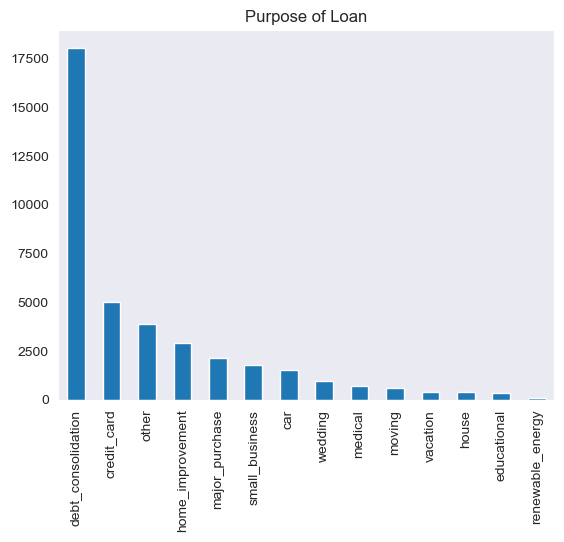

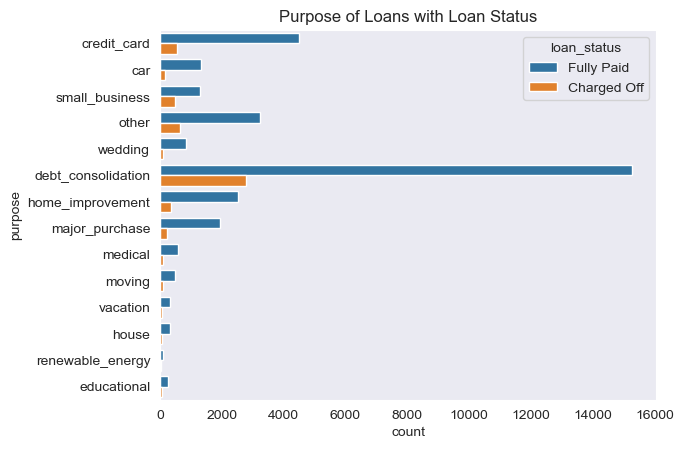

In [89]:
loan_data['purpose'].value_counts().plot.bar(title= 'Purpose of Loan')
plt.show()
plt.title(label = "Purpose of Loans with Loan Status")
ax = sns.countplot(y="purpose",data=loan_data,hue='loan_status')
plt.show()

In [163]:
#calculate the percentage of loan defaulters according to loan purpose
purpose_data=pd.DataFrame(data=round((100* defaulters_data['purpose'].value_counts())/loan_data['purpose'].value_counts(),2))
purpose_data.rename(columns={'purpose':'defaulter_perc'},inplace=True)
purpose_data.sort_values(by='defaulter_perc',ascending=False,inplace=True)
purpose_data

,defaulter_perc
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13
home_improvement,12.07


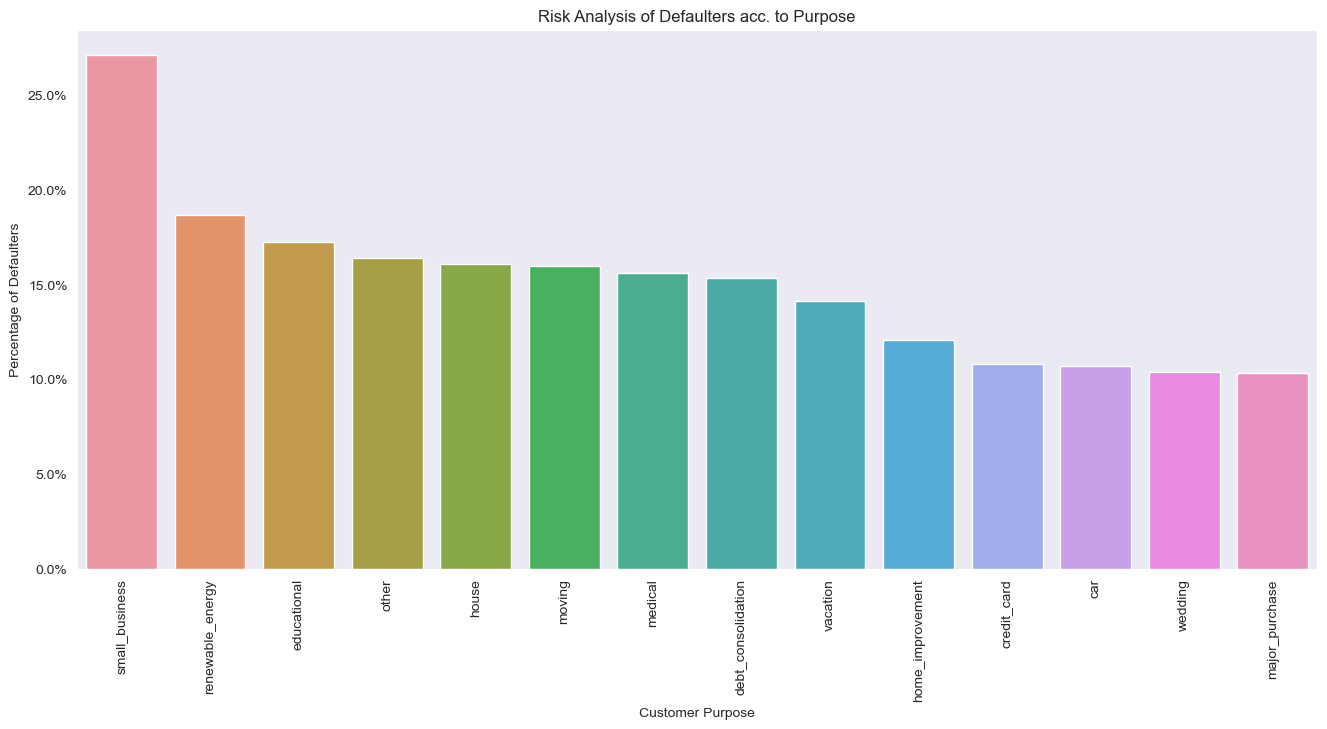

In [164]:
plt.figure(figsize=(16,7))
ax=sns.barplot(x=purpose_data.index,y='defaulter_perc',data=purpose_data)
ax.set(xlabel='Customer Purpose', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

Observations :

1. Maximum Loans are taken for Debt_Consolidation
2. Debt_Consolidation also has highest number of Charged Off Loans
3. Highest percentage of defaulters are from Small Business then Renewable Energy and then Eductaion.

We will further analysis Debt_Consolidation and Charged Off Loans in bivaritate analysis.

2. Loan Verification Status

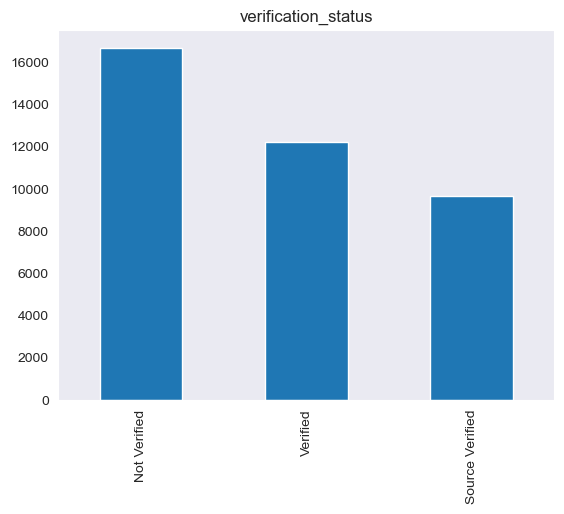

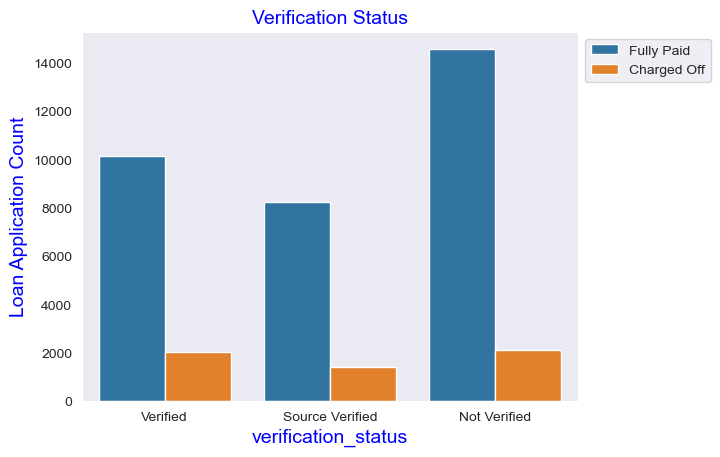

In [142]:
#Loan Verification Status
loan_data['verification_status'].value_counts().plot.bar(title= 'verification_status')
plt.show()
#loan_data['verification_status'].value_counts()/len(loan_data)*100

# Loan Verification Status with respect to Loan Status


ax = sns.countplot(x= "verification_status",data= loan_data,hue= 'loan_status')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Verification Status',fontsize=14,color='b')
ax.set_xlabel('verification_status',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()




Observations :

1. We cannot draw a conclusion of impact of verification status on loan status

3. Home Ownership

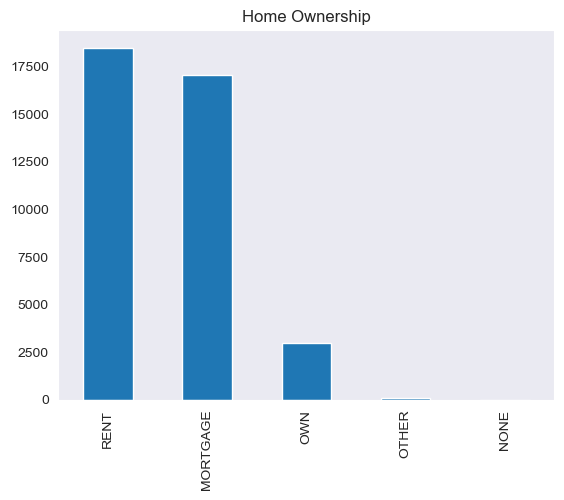

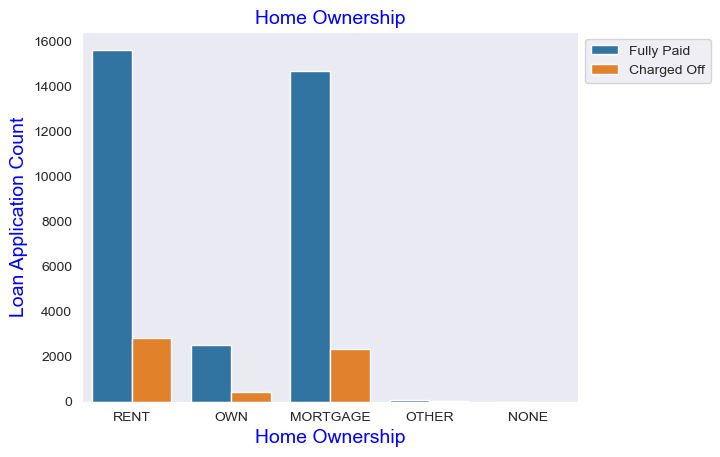

RENT        47.90
MORTGAGE    44.12
OWN          7.71
OTHER        0.25
NONE         0.01
Name: home_ownership, dtype: float64

In [141]:
loan_data['home_ownership'].value_counts().plot.bar(title= 'Home Ownership')
plt.show()
 #Let's now look at the home_ownership with respect to loan_status
ax = sns.countplot(x= "home_ownership",data= loan_data,hue= 'loan_status')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='b')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'b')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'b')      
plt.show()

round((loan_data['home_ownership'].value_counts()/len(loan_data)*100),2)


In [167]:
home_data=pd.DataFrame(data=round((100*defaulters_data['home_ownership'].value_counts())/loan_data['home_ownership'].value_counts(),2))
home_data.rename(columns={'home_ownership':'defaulter_perc'},inplace=True)
home_data.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home_data.dropna(inplace=True)
home_data


,defaulter_perc
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


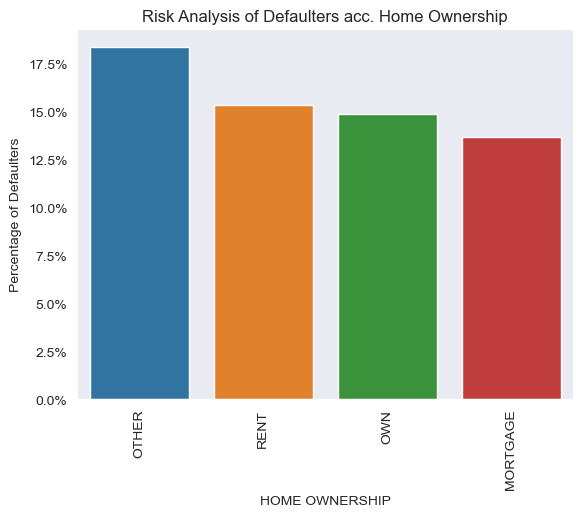

In [169]:
ax=sns.barplot(x=home_data.index,y='defaulter_perc',data=home_data)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()


Obeservations:

47% are applicants stay on rent
44% applicants stau in Mortgage
7% applicants own a house
Other can have varaity of data hence ignoring it we can say that around 15% of applicant staying on rent deafult on their payment.

4. Loan Issued Timeline

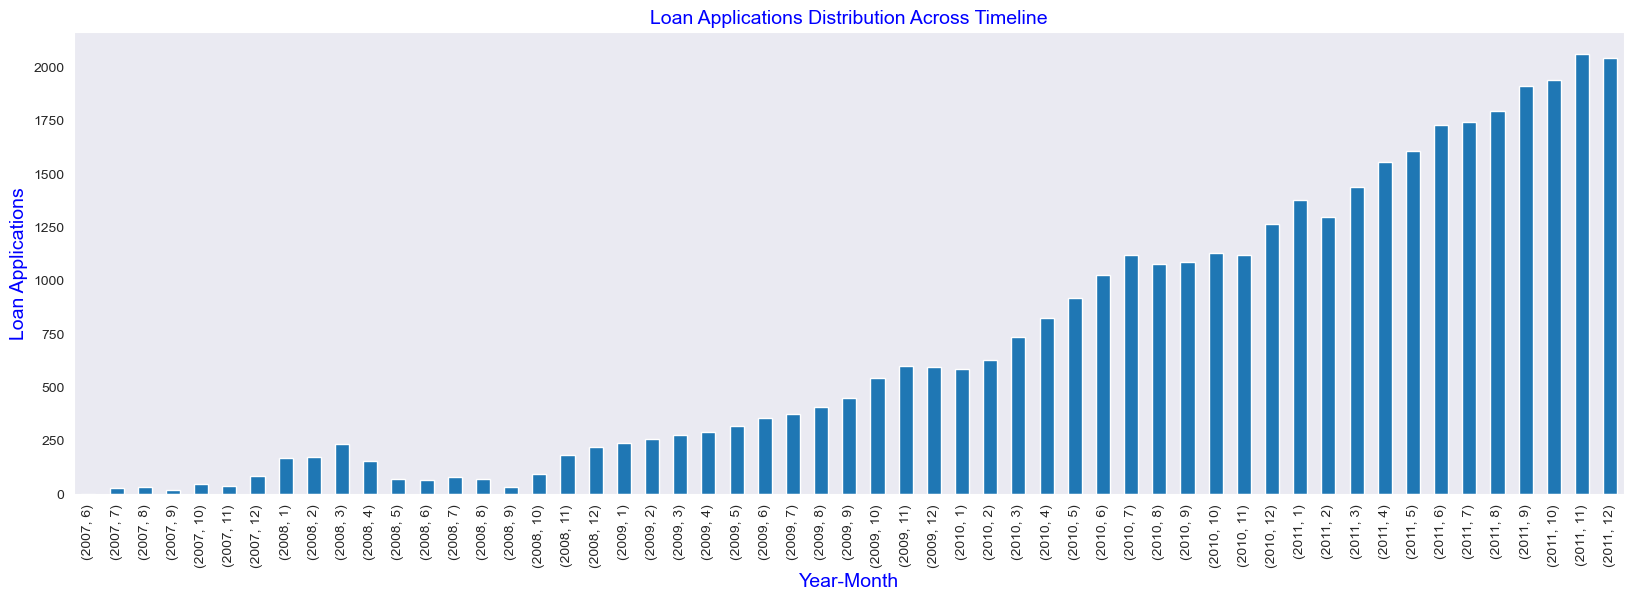

In [118]:
# Let us look into number of loans which were approved every year/month
# Lets use derived column year to check pattern of loan issuing over the years.

plt.figure(figsize=(20,6),facecolor='w')
loan_data.groupby(['issue_d_Year','issue_d_Month']).loan_status.count().plot(kind='bar')
plt.ylabel('Loan Applications',fontsize=14,color='b')
plt.xlabel('Year-Month',fontsize=14,color = 'b')      
plt.title("Loan Applications Distribution Across Timeline",fontsize=14,color='b')
plt.show()

Observations :

1. There is an increase in the number of loans processed every Year. 
2. There is decrease in Loan processed from May 2008 - Dec 2008. Probably due to Recession.
3. Highest number of loans are issued in November and December.Probably due to some promotion campagian during festive season

5.  Impact of duration of Credit Line

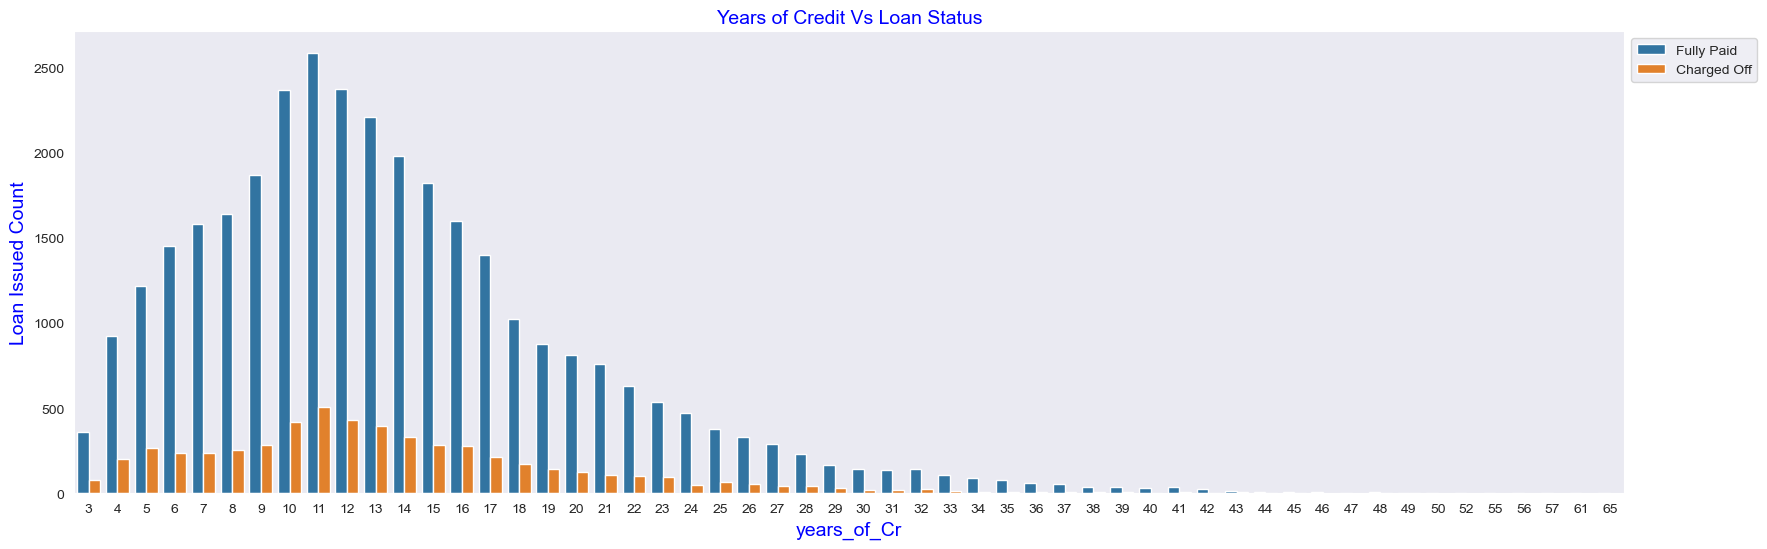

In [140]:

plt.figure(figsize=(20,6),facecolor='w')
ax = sns.countplot(x= "years_of_Cr",data= loan_data,hue= 'loan_status')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Years of Credit Vs Loan Status',fontsize=14,color='b')
ax.set_xlabel('years_of_Cr',fontsize=14,color = 'b')
ax.set_ylabel('Loan Issued Count',fontsize=14,color = 'b')      
plt.show()

Obeservations :

1. Higher the number of Years from earliest credit line , lower the probability to default.
2. Maximum number of loans are issued to applications with 10-12 years of credit line history.

In [ ]:
6. Analysis of Grade

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


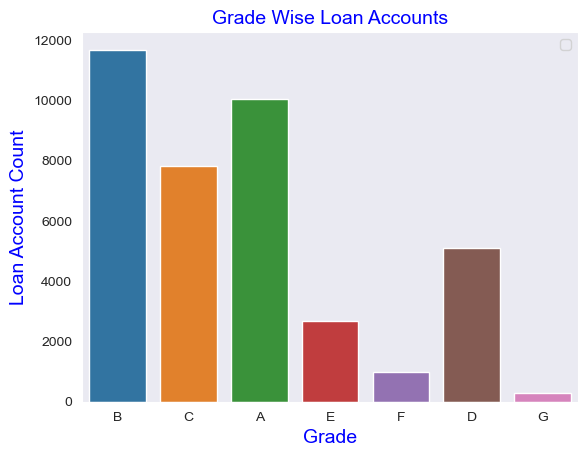

In [154]:

ax = sns.countplot(x="grade",data=loan_data)
ax.set_title('Grade Wise Loan Accounts',fontsize=14,color='b')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
ax.set_ylabel('Loan Account Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


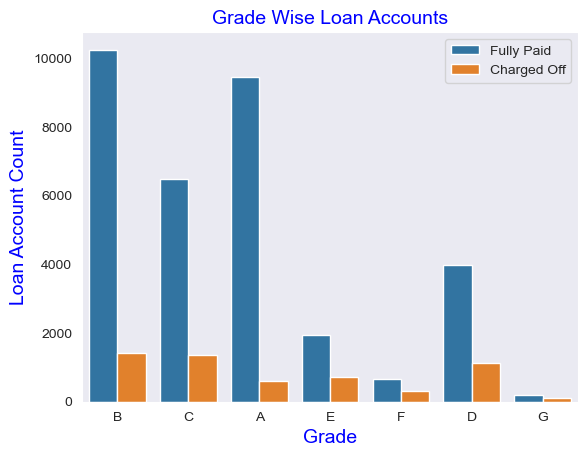

In [155]:
ax = sns.countplot(x="grade",data=loan_data,hue='loan_status')
ax.set_title('Grade Wise Loan Accounts',fontsize=14,color='b')
ax.set_xlabel('Grade',fontsize=14,color = 'b')
ax.set_ylabel('Loan Account Count',fontsize=14,color = 'b')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


In [161]:
#create a separate dataframe of defaulters
defaulters_data=loan_data.loc[loan_data['loan_status']=="Charged Off"]
defaulters_data.head()
grade_data=pd.DataFrame(data=round((100*defaulters_data['grade'].value_counts())/loan_data['grade'].value_counts(),2))
grade_data.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_data


,defaulter_perc
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


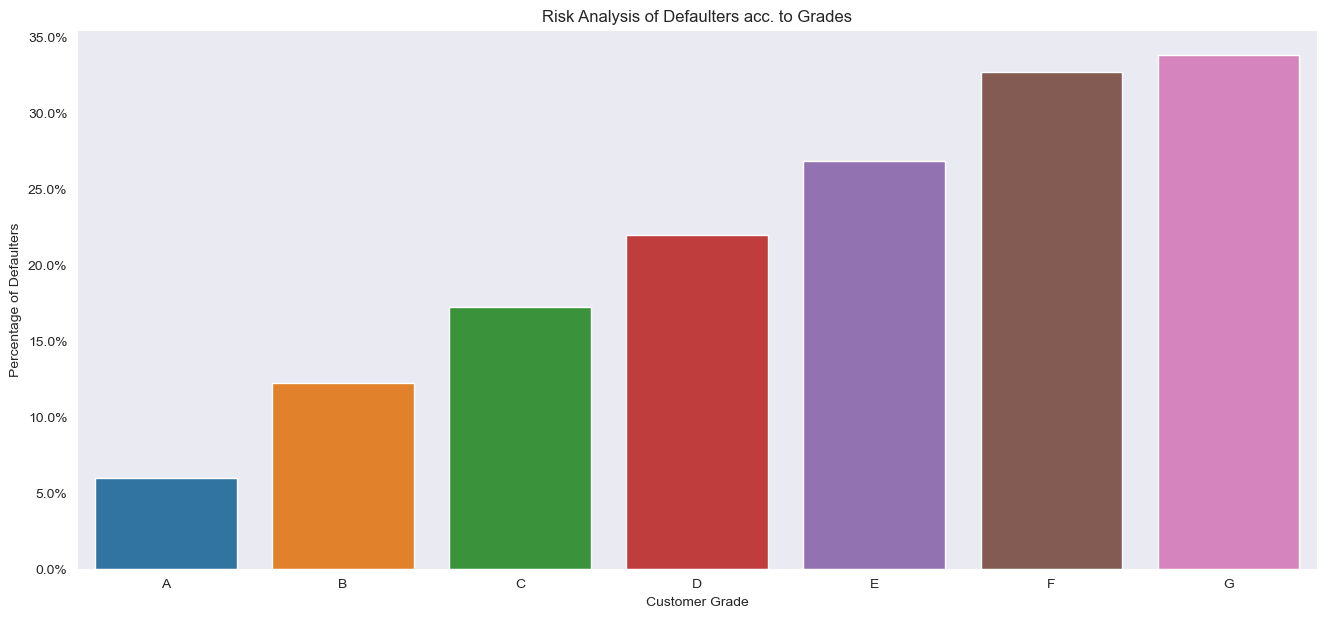

In [162]:
plt.figure(figsize=(16,7))
ax=sns.barplot(x=grade_data.index,y='defaulter_perc',data=grade_data)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Observations:

Grade B applicant recieved the highest number of Loans followed by A
Grade G has highest percentage of defaulters.

In [ ]:
7. Loan amount to Income Ratio

In [170]:
# Deriving Loan Amount Income Ratio from Loan Amount and Annual Increment
loan_data['LoanAmt_Income_ratio'] = round(loan_data['loan_amnt']/loan_data['annual_inc'],2)
loan_data['LoanAmt_Income_ratio'].describe()


count    38577.000000
mean         0.185836
std          0.115290
min          0.000000
25%          0.100000
50%          0.160000
75%          0.250000
max          0.830000
Name: LoanAmt_Income_ratio, dtype: float64

c:\Users\ajayr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_status', ylabel='LoanAmt_Income_ratio'>

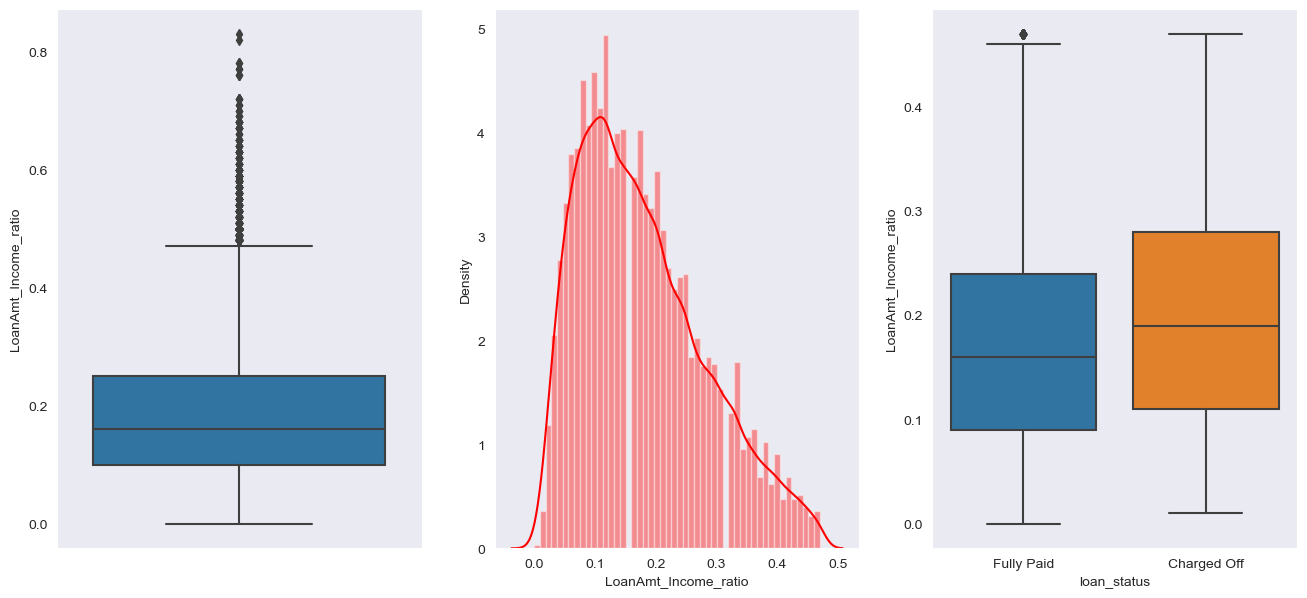

In [175]:
    f,axes = plt.subplots(1, 3, figsize=(16, 7))
    sns.boxplot(y='LoanAmt_Income_ratio',  data=loan_data, ax=axes[0])  
    
    Q1 = loan_data['LoanAmt_Income_ratio'].quantile(0.25)
    Q3 = loan_data['LoanAmt_Income_ratio'].quantile(0.75)
    IQR = Q3 - Q1
    loan_data1 = loan_data[(loan_data['LoanAmt_Income_ratio'] >= (Q1 - 1.5 * IQR))&(loan_data['LoanAmt_Income_ratio'] <= (Q3 + 1.5 * IQR))]
    sns.distplot(loan_data1['LoanAmt_Income_ratio'], kde=True, color="r", ax=axes[1]);
    #sns.distplot(loan[name], kde=True, color="b", ax=axes[1]);
    
    sns.boxplot(y='LoanAmt_Income_ratio', x="loan_status", data=loan_data1, ax=axes[2])

Observations:

Borrowers with high loan amount to income ratio are likely to default on their loans more.

8. Employee Expirence 

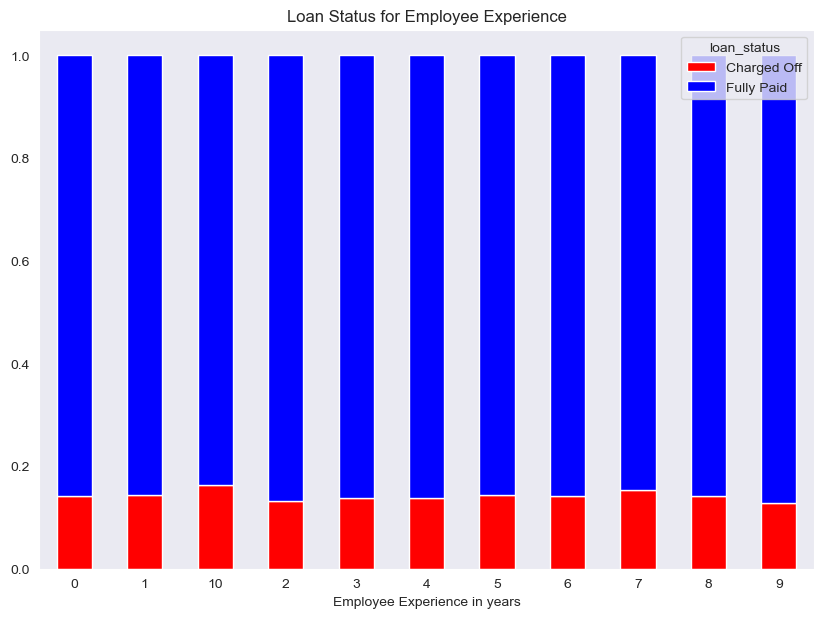

In [179]:
loan_data_emp_exp = pd.crosstab(loan_data.emp_length,loan_data.loan_status,normalize='index')
loan_data_emp_exp.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Loan Status for Employee Experience')
plt.xlabel('Employee Experience in years')
plt.xticks(rotation=360)
plt.show()

Observation :

Applicants with Professional Expirence more than 10 years are more prone to default.

9. Term Distribution

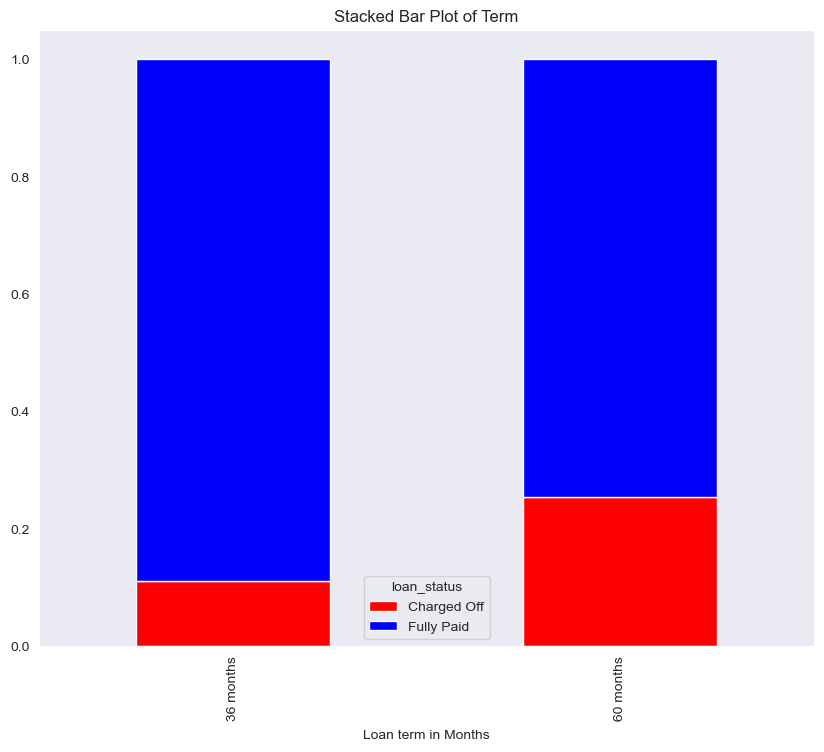

In [180]:
data_term = pd.crosstab(loan_data.term,loan_data.loan_status,normalize='index')
data_term.plot(kind='bar', stacked=True, figsize=[10,8],color=['red','blue'])
plt.title('Stacked Bar Plot of Term')
plt.xlabel('Loan term in Months')
plt.show()


Observation :

1. Loan with 60 months term is more likely to default than loan with 36 months term